In [1]:
import pandas as pd
import numpy as np
import copy
%matplotlib inline

In [3]:
df_flights = pd.read_csv('data/flights.csv')

In [4]:
df_flights.head()

,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute
0,2014,1,1,1.0,96.0,235.0,70.0,AS,N508AS,145,PDX,ANC,194.0,1542,0.0,1.0
1,2014,1,1,4.0,-6.0,738.0,-23.0,US,N195UW,1830,SEA,CLT,252.0,2279,0.0,4.0
2,2014,1,1,8.0,13.0,548.0,-4.0,UA,N37422,1609,PDX,IAH,201.0,1825,0.0,8.0
3,2014,1,1,28.0,-2.0,800.0,-23.0,US,N547UW,466,PDX,CLT,251.0,2282,0.0,28.0
4,2014,1,1,34.0,44.0,325.0,43.0,AS,N762AS,121,SEA,ANC,201.0,1448,0.0,34.0


In [6]:
print(df_flights.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162049 entries, 0 to 162048
Data columns (total 16 columns):
year         162049 non-null int64
month        162049 non-null int64
day          162049 non-null int64
dep_time     161192 non-null float64
dep_delay    161192 non-null float64
arr_time     161061 non-null float64
arr_delay    160748 non-null float64
carrier      162049 non-null object
tailnum      161801 non-null object
flight       162049 non-null int64
origin       162049 non-null object
dest         162049 non-null object
air_time     160748 non-null float64
distance     162049 non-null int64
hour         161192 non-null float64
minute       161192 non-null float64
dtypes: float64(7), int64(5), object(4)
memory usage: 19.8+ MB
None


## The columns with object dtype are the possible categorical features in your dataset.

In [7]:
df_flights.describe()

,year,month,day,dep_time,dep_delay,arr_time,arr_delay,flight,air_time,distance,hour,minute
count,162049.0,162049.000000,162049.000000,161192.000000,161192.000000,161061.000000,160748.000000,162049.000000,160748.000000,162049.000000,161192.000000,161192.000000
mean,2014.0,6.605027,15.749890,1278.283755,6.133859,1482.501282,2.240868,1357.356725,152.588511,1204.514634,12.479515,30.332244
std,0.0,3.324399,8.789417,522.583793,29.112035,523.958781,31.191037,1495.271031,72.547469,653.150062,5.232476,18.061569
min,2014.0,1.000000,1.000000,1.000000,-37.000000,1.000000,-67.000000,2.000000,18.000000,93.000000,0.000000,0.000000
25%,2014.0,4.000000,8.000000,831.000000,-5.000000,1127.000000,-12.000000,408.000000,103.000000,689.000000,8.000000,14.000000
50%,2014.0,7.000000,16.000000,1217.000000,-2.000000,1517.000000,-4.000000,694.000000,129.000000,991.000000,12.000000,30.000000
75%,2014.0,9.000000,23.000000,1721.000000,5.000000,1918.000000,7.000000,1726.000000,199.000000,1660.000000,17.000000,47.000000
max,2014.0,12.000000,31.000000,2400.000000,1553.000000,2400.000000,1539.000000,6527.000000,422.000000,2724.000000,24.000000,59.000000


In [8]:
df_flights.select_dtypes('object')

,carrier,tailnum,origin,dest
0,AS,N508AS,PDX,ANC
1,US,N195UW,SEA,CLT
2,UA,N37422,PDX,IAH
3,US,N547UW,PDX,CLT
4,AS,N762AS,SEA,ANC
5,DL,N806DN,SEA,DTW
6,UA,N14219,SEA,ORD
7,UA,N813UA,PDX,IAH
8,UA,N75433,SEA,DEN
9,UA,N574UA,SEA,EWR


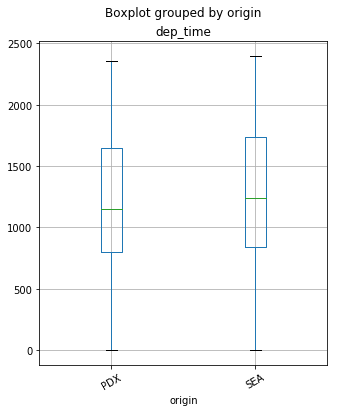

In [10]:
df_flights.boxplot('dep_time','origin',rot = 30,figsize=(5,6))

In [11]:
cat_df_flights = df_flights.select_dtypes(include=['object']).copy()
#The method .copy() is used here so that any changes made in new DataFrame don't get reflected in the original one.

In [12]:
cat_df_flights.head()

,carrier,tailnum,origin,dest
0,AS,N508AS,PDX,ANC
1,US,N195UW,SEA,CLT
2,UA,N37422,PDX,IAH
3,US,N547UW,PDX,CLT
4,AS,N762AS,SEA,ANC


In [16]:
#One of the most common data pre-processing steps is to check for null values in the dataset. You can get the total number of missing values
cat_df_flights.isnull().values.sum()

248

In [18]:
cat_df_flights.isnull().any()

carrier    False
tailnum     True
origin     False
dest       False
dtype: bool

In [20]:
cat_df_flights.isnull().sum()

carrier      0
tailnum    248
origin       0
dest         0
dtype: int64

In [28]:
#You can do a mode imputation for those null values. The function fillna() is handy for such operations
#Find the most common values
tailnum_common = cat_df_flights['tailnum'].value_counts().index[0]
cat_df_flights = cat_df_flights.fillna(tailnum_common)

In [29]:
cat_df_flights.isnull().any()

carrier    False
tailnum    False
origin     False
dest       False
dtype: bool

In [30]:
cat_df_flights.carrier.value_counts()

AS    62460
WN    23355
OO    18710
DL    16716
UA    16671
AA     7586
US     5946
B6     3540
VX     3272
F9     2698
HA     1095
Name: carrier, dtype: int64

In [31]:
cat_df_flights.carrier.value_counts().count()

11

In [33]:
cat_df_flights.carrier.nunique()

11

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

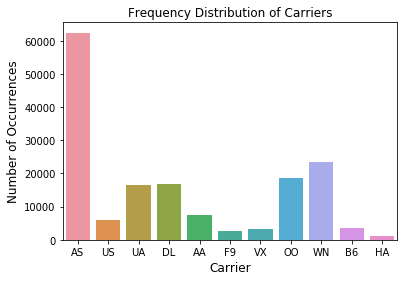

In [40]:
sns.countplot(cat_df_flights.carrier)
plt.title('Frequency Distribution of Carriers')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Carrier', fontsize=12)
plt.show()

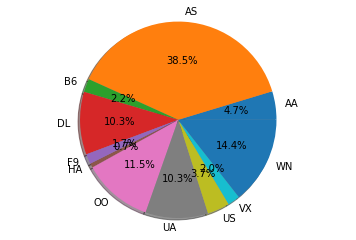

In [41]:
labels = cat_df_flights['carrier'].astype('category').cat.categories.tolist()
counts = cat_df_flights['carrier'].value_counts()
sizes = [counts[var_cat] for var_cat in labels]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True) #autopct is show the % on plot
ax1.axis('equal')
plt.show()

## Encoding Categorical Data
### The techniques that you'll cover are the following:
* Replacing values
* Encoding labels
* One-Hot encoding
* Binary encoding
* Backward difference encoding
* Miscellaneous features


In [43]:
#Replacing values
replace_map = {'carrier': {'AA': 1, 'AS': 2, 'B6': 3, 'DL': 4,
                                  'F9': 5, 'HA': 6, 'OO': 7 , 'UA': 8 , 'US': 9,'VX': 10,'WN': 11}}


In [48]:
labels = cat_df_flights['carrier'].astype('category').cat.categories.tolist()

In [50]:
replace_map_comp = {'carrier' : {k: v for k,v in zip(labels,list(range(1,len(labels)+1)))}}
print(replace_map_comp)

{'carrier': {'AA': 1, 'AS': 2, 'B6': 3, 'DL': 4, 'F9': 5, 'HA': 6, 'OO': 7, 'UA': 8, 'US': 9, 'VX': 10, 'WN': 11}}


In [51]:
cat_df_flights_replace = cat_df_flights.copy()

In [52]:
cat_df_flights_replace.replace(replace_map_comp, inplace=True)

print(cat_df_flights_replace.head())

   carrier tailnum origin dest
0        2  N508AS    PDX  ANC
1        9  N195UW    SEA  CLT
2        8  N37422    PDX  IAH
3        9  N547UW    PDX  CLT
4        2  N762AS    SEA  ANC


In [53]:
print(cat_df_flights_replace['carrier'].dtypes)

int64


### Tip: in Python, it's a good practice to typecast categorical features to a category dtype because they make the operations on such columns much faster than the object dtype. You can do the typecasting by using .astype() method on your columns

In [55]:
cat_df_flights_lc = cat_df_flights.copy()
cat_df_flights_lc['carrier'] = cat_df_flights_lc['carrier'].astype('category')
cat_df_flights_lc['origin'] = cat_df_flights_lc['origin'].astype('category')                                                              

print(cat_df_flights_lc.dtypes)

carrier    category
tailnum      object
origin     category
dest         object
dtype: object


In [56]:
#Label Encoding
cat_df_flights_lc['carrier'] = cat_df_flights_lc['carrier'].cat.codes
cat_df_flights_lc.head()

,carrier,tailnum,origin,dest
0,1,N508AS,PDX,ANC
1,8,N195UW,SEA,CLT
2,7,N37422,PDX,IAH
3,8,N547UW,PDX,CLT
4,1,N762AS,SEA,ANC


In [57]:
cat_df_flights_sklearn = cat_df_flights.copy()

from sklearn.preprocessing import LabelEncoder

lb_make = LabelEncoder()
cat_df_flights_sklearn['carrier_code'] = lb_make.fit_transform(cat_df_flights['carrier'])

cat_df_flights_sklearn.head() #Results in appending a new column to df

,carrier,tailnum,origin,dest,carrier_code
0,AS,N508AS,PDX,ANC,1
1,US,N195UW,SEA,CLT,8
2,UA,N37422,PDX,IAH,7
3,US,N547UW,PDX,CLT,8
4,AS,N762AS,SEA,ANC,1


In [58]:
#One-Hot encoding
cat_df_flights_onehot = cat_df_flights.copy()
cat_df_flights_onehot = pd.get_dummies(cat_df_flights_onehot, columns=['carrier'], prefix = ['carrier'])

print(cat_df_flights_onehot.head())

  tailnum origin dest  carrier_AA  carrier_AS  carrier_B6  carrier_DL  \
0  N508AS    PDX  ANC           0           1           0           0   
1  N195UW    SEA  CLT           0           0           0           0   
2  N37422    PDX  IAH           0           0           0           0   
3  N547UW    PDX  CLT           0           0           0           0   
4  N762AS    SEA  ANC           0           1           0           0   

   carrier_F9  carrier_HA  carrier_OO  carrier_UA  carrier_US  carrier_VX  \
0           0           0           0           0           0           0   
1           0           0           0           0           1           0   
2           0           0           0           1           0           0   
3           0           0           0           0           1           0   
4           0           0           0           0           0           0   

   carrier_WN  
0           0  
1           0  
2           0  
3           0  
4           0  


In [ ]:
#Binary encoding
cat_df_flights_ce = cat_df_flights.copy()

import category_encoders as ce

encoder = ce.BinaryEncoder(cols=['carrier'])
df_binary = encoder.fit_transform(cat_df_flights_ce)

df_binary.head()

In [ ]:
#Backward Difference Encoding
encoder = ce.BackwardDifferenceEncoder(cols=['carrier'])
df_bd = encoder.fit_transform(cat_df_flights_ce)

df_bd.head()